In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

#import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
#plt.rcParams['figure.figsize']=7,4
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("d:/presentation.csv")
x = df.iloc[:,0:26]
y=df.iloc[:,-1]
target=y

In [3]:
x=scale(x)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [4]:
kmeans=KMeans(n_clusters=2,random_state=5,verbose=0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [5]:
color_theme=np.array(['red','green'])
color_theme
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [6]:
kmeans.cluster_centers_

array([[-3.25954344e-01, -3.41881729e-01, -4.69457901e-01,
         1.00503782e-01, -6.03022689e-02, -4.49050209e-01,
        -3.01511345e-01, -5.77350269e-01, -1.98679854e-01,
        -3.53553391e-01, -2.76053052e-01,  6.78496910e-02,
         7.84802682e-02, -4.01609664e-01, -5.55555556e-01,
        -4.22115882e-01,  0.00000000e+00, -3.88973311e-01,
         1.00503782e-01, -4.31753398e-17, -4.87881306e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -7.62892134e-01],
       [ 3.25954344e-01,  3.41881729e-01,  4.69457901e-01,
        -1.00503782e-01,  6.03022689e-02,  4.49050209e-01,
         3.01511345e-01,  5.77350269e-01,  1.98679854e-01,
         3.53553391e-01,  2.76053052e-01, -6.78496910e-02,
        -7.84802682e-02,  4.01609664e-01,  5.55555556e-01,
         4.22115882e-01,  0.00000000e+00,  3.88973311e-01,
        -1.00503782e-01, -1.85037171e-17,  4.87881306e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00

In [103]:
#x=df.iloc[:,20]
#y=df.iloc[:,7]
#x


In [104]:
#plt.subplot()
#plt.scatter(x,y,c=color_theme[kmeans.labels_],s=50)
#plt.subplot(2,1,2)
#plt.scatter(x[3],x[9]=color_theme[kmeans.labels_])


In [105]:
#centers = kmeans.cluster_centers_
#np.shape(centers)

In [106]:

#plt.scatter(centers[:,0],centers[:,1],c='green', s=200, alpha=0.5); #plotting centres



In [107]:
#centers=np.reshape(centers,(26,2))
#plt.scatter(centers[:,0],centers[:,1],c='blue', s=200, alpha=0.5)

In [7]:
#relabel=np.choose(kmeans.labels_,[1,0])
print(classification_report(y,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.95      0.97        19

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y, kmeans.labels_)

0.9722222222222222

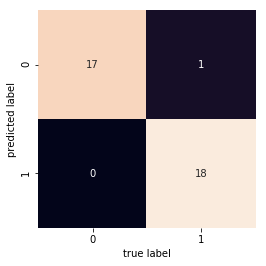

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y,kmeans.labels_)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [10]:
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)

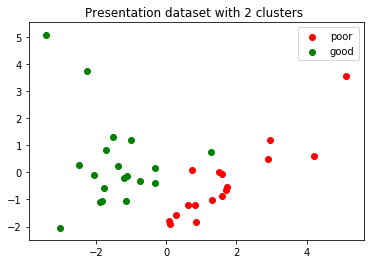

In [12]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
         marker='o')
    elif y[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')

pl.legend([c1, c2], ['poor', 'good'])
pl.title('Presentation dataset with 2 clusters ')
pl.show()